# Customer Segmentation
![](https://i.postimg.cc/brNCCFWJ/customer-segmentation-word-concepts-banner-106317-4072.jpg)

**Problem Statement**: Segementation of retail customers using RFM framework (recency of last purchase, Frequecy of purchases and monetary value of purchases)

**Dataset Columns**
1. Date of Sales Transaction
2. Customer ID
3. Transaction ID
4. SKU Category ID
5. SKU ID
6. Quantity Sold
7. Sales Amount (Unit price times quantity. For unit price, please divide Sales Amount by Quantity.)

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['font.size'] = 8
sns.set(font_scale=0.8)

In [2]:
sales = pd.read_csv('/kaggle/input/retail-store-sales-transactions/scanner_data.csv')
sales.drop(columns=['Unnamed: 0'], inplace=True)
sales.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [3]:
sales.shape

(131706, 7)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [5]:
#Converting Date column to correct dtype
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


Lets Check for null values

In [6]:
sales.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

Lets check for duplicates

In [7]:
sales.duplicated().sum()

0

In [8]:
sales.describe()

,Date,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706,131706.000000,131706.000000,131706.000000,131706.000000
mean,2016-07-04 18:00:03.608036096,12386.450367,32389.604187,1.485311,11.981524
min,2016-01-02 00:00:00,1.000000,1.000000,0.010000,0.020000
25%,2016-04-05 00:00:00,7349.000000,16134.000000,1.000000,4.230000
50%,2016-07-02 00:00:00,13496.000000,32620.000000,1.000000,6.920000
75%,2016-10-07 00:00:00,17306.000000,48548.000000,1.000000,12.330000
max,2016-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000
std,NaN,6086.447552,18709.901238,3.872667,19.359699


We notice that some values in quantity are float values but both sales and quantity values are greater than 0

## Cohort Analysis

We'll be creating the following features for cohort analysis:
* Bill month: year and month of every transaction (since our data is only for 2016, we will etract the month only)
* Cohort group: year and month of customer's first purchase
* Cohort index: Number of months passed since the customer's first purchase

In [9]:
sales['bill_month'] = sales['Date'].dt.month
sales['cohort_group']=sales.groupby('Customer_ID')['bill_month'].transform('min')
sales['cohort_index'] = sales['bill_month']-sales['cohort_group']+1
sales.sample(5)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,bill_month,cohort_group,cohort_index
75478,2016-08-31,18327,41605,FU5,3ZY0H,2.0,9.93,8,6,3
77199,2016-09-05,15116,42382,N8U,JJLXQ,1.0,4.77,9,9,1
104215,2016-11-07,15828,54196,IEV,PWG2Z,1.0,5.01,11,3,9
5597,2016-01-18,6259,2652,N8U,ZDSYK,3.0,5.12,1,1,1
128363,2016-07-25,11090,36234,IEV,3PWIY,2.0,13.42,7,5,3


In [10]:
#Cohort Counts
cohort_count = sales.pivot_table(index='cohort_group', columns='cohort_index', values='Customer_ID', aggfunc='nunique')
cohort_count

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_group,,,,,,,,,,,,
1,3396.0,1306.0,1025.0,597.0,266.0,197.0,152.0,137.0,90.0,56.0,41.0,40.0
2,2221.0,478.0,291.0,147.0,95.0,68.0,68.0,57.0,22.0,18.0,14.0,NaN
3,2642.0,746.0,651.0,600.0,530.0,521.0,530.0,512.0,513.0,532.0,NaN,NaN
4,2527.0,728.0,633.0,553.0,566.0,595.0,566.0,567.0,581.0,NaN,NaN,NaN
5,2626.0,626.0,559.0,505.0,566.0,551.0,521.0,523.0,NaN,NaN,NaN,NaN
6,1569.0,278.0,274.0,280.0,278.0,277.0,300.0,NaN,NaN,NaN,NaN,NaN
7,1213.0,172.0,183.0,189.0,182.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1060.0,163.0,138.0,143.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1625.0,309.0,263.0,297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Month-on-Month Retention Rates**

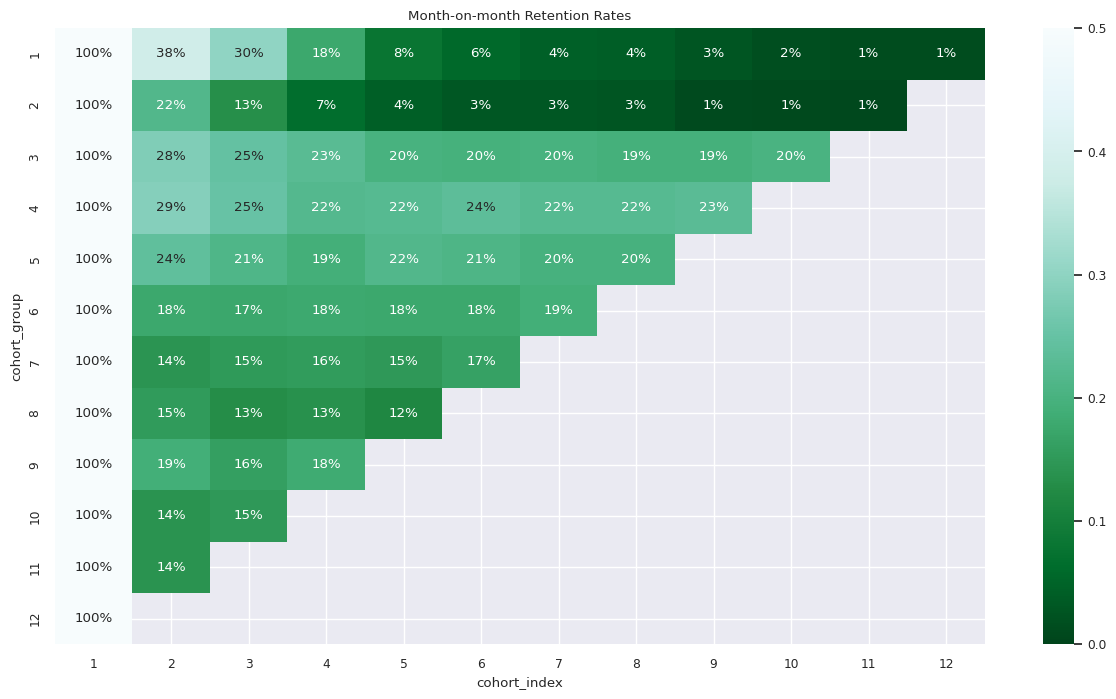

In [11]:
# Month-on-month Retention Rate

cohort_size = cohort_count.iloc[:,0]
cohort_retention = cohort_count.divide(cohort_size, axis=0)

# Heatmap to visualise retention rates

plt.figure(figsize=(15,8))
plt.title('Month-on-month Retention Rates')
sns.heatmap(cohort_retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap="BuGn_r")
plt.show()

For each cohort (rows), this heatmap shows the percentage of active customers in each successive month.  We can observe that the Jan and Feb cohorts have extremely low retention rates. The retention % gets better from March onwards.

**Cohort-wise Average Sale Amount**

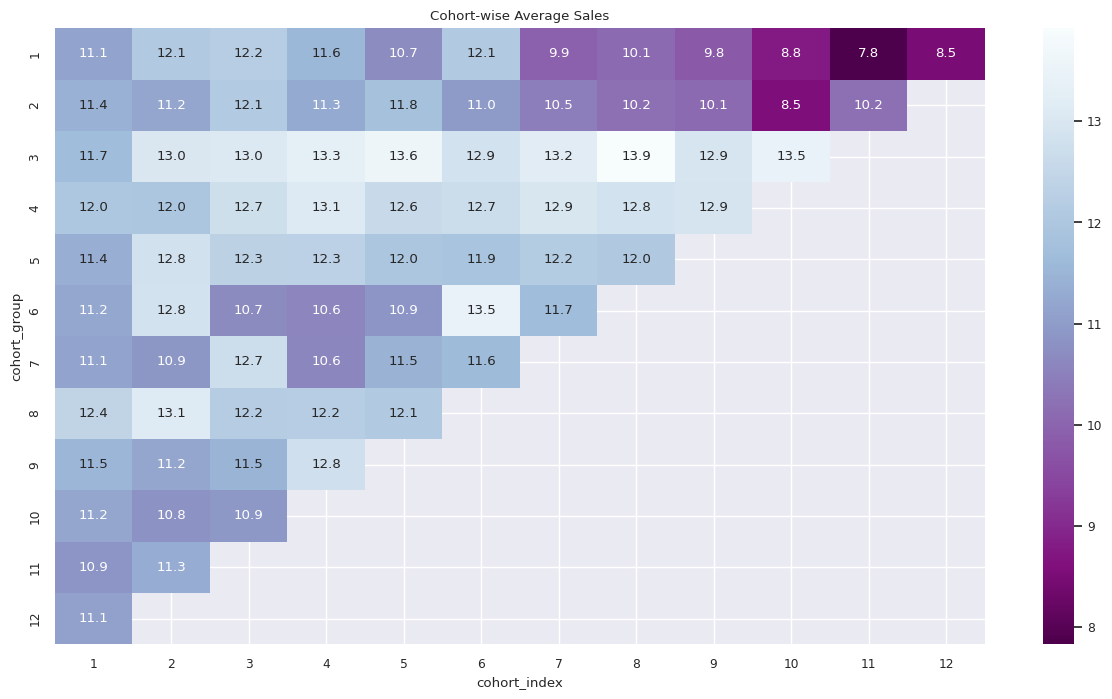

In [12]:
cohort_avg_sales = sales.pivot_table(index='cohort_group', columns='cohort_index', values='Sales_Amount', aggfunc='mean')

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Cohort-wise Average Sales')
sns.heatmap(cohort_avg_sales,annot = True,cmap="BuPu_r", fmt='.1f')
plt.show()

The Jan and Feb cohorts have shown maximum decrease in average sale value. For the other cohorts, there's not much of an impact. The customers, who are retained, continue to make purchases of similar value or slightly more.

## RFM: Recency, Frequency and Monetary Value

The RFM framework is a widely used method in customer segmentation and analysis. It stands for Recency, Frequency, and Monetary Value. The RFM framework helps categorize customers based on their purchase behavior and assigns them to specific segments, allowing businesses to better understand and target their customer base. Here's a breakdown of each component:

* Recency (R): Recency refers to the time elapsed since the customer's last purchase. Customers who made a purchase more recently are considered more engaged and valuable to the business.

* Frequency (F): Frequency relates to the number of purchases made by a customer within a specific period. Customers with a higher frequency of purchases are often more loyal and may have a stronger affinity for the brand.

* Monetary Value (M): Monetary Value represents the total amount of money spent by a customer during a specific timeframe. Customers with higher monetary value are typically considered more valuable and may have higher potential for cross-selling or upselling.

After dividing customers into segments based on the RFM scores, (this can be done using various methods like percentiles, quartiles, or clustering techniques), targeted marketing strategies and campaigns can be developed for each segment to optimize customer engagement, retention, and growth.

![](https://i.postimg.cc/c4f8WjCk/rfm.png)  
Source: https://clevertap.com/blog/rfm-analysis/   

We will be using percentile-based grouping according to the calculated metrics of recency, frequency and monetary value.

**Calculating RFM Metrics:**

In [13]:
# Reference date for recency
last_day = sales['Date'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = sales.groupby('Customer_ID').agg({'Date': lambda x: (last_day-x.max()).days, 
                                        'Transaction_ID':'count', 
                                       'Sales_Amount':'sum'})
rfm.rename(columns={'Date':'recency','Transaction_ID':'frequency','Sales_Amount':'monetary_value'}, inplace=True)
rfm.head(10)

,recency,frequency,monetary_value
Customer_ID,,,
1,345,2,16.29
2,196,2,22.77
3,365,3,10.92
4,53,5,33.29
5,180,5,78.82
6,276,3,25.55
7,88,1,17.84
8,194,1,9.78
9,287,1,15.75


* We will assign low ratings/quartiles to high values of recency (beacuse higher number of days since last purchase is undesirable)
* For frequency and monetary value, higher values will be assigned higher ratings/quartiles

**Distribution of RFM Metrics**

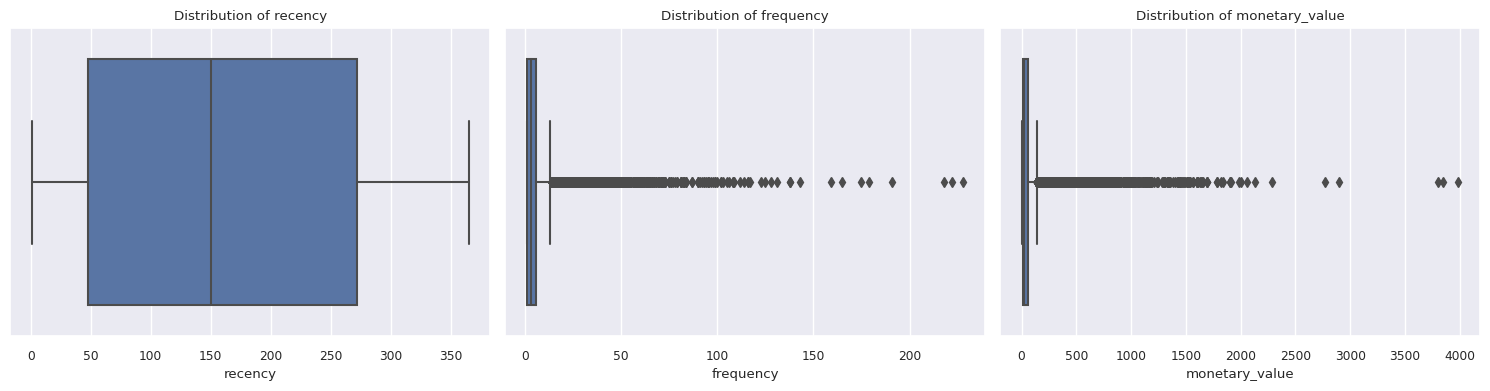

In [14]:
plt.figure(figsize=(15,4))
i=1
for col in ['recency','frequency','monetary_value']:
    ax=plt.subplot(1,3,i)
    sns.boxplot(x=rfm[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    i +=1
plt.tight_layout()
plt.show();

* Days passed since last purchase ranges from 1 to over 350 (dataset consists of 365 days only)
* The purchase frequency of customers ranges from 1 to over 200 (although there are hardly any customers beyond 100)
* Maximum total monetary value of total purchases made by a customer is 4000 dollars but majority customers are concentrated in 0-100 range 

In [15]:
#Assigning labels for recency, frequency and monetary value to each customer
r_cat = range(3,0,-1)
f_cat = range(1,4) 
m_cat = range(1,4)
r_segments = pd.qcut(rfm['recency'], q=3, labels=r_cat)
f_segments = pd.qcut(rfm['frequency'], q=3, labels=f_cat)
m_segments = pd.qcut(rfm['monetary_value'], q=3, labels=m_cat)
rfm = rfm.assign(r = r_segments, f=f_segments, m=m_segments)

#Calculating the RFM segment and RFM score for each customer
rfm['segment'] = rfm.apply(lambda x: str(int(x['r']))+str(int(x['f']))+str(int(x['m'])), axis=1)
rfm['score'] = rfm[['r','f','m']].sum(axis=1)

rfm.head(10)

,recency,frequency,monetary_value,r,f,m,segment,score
Customer_ID,,,,,,,,
1,345,2,16.29,1,1,2,112,4
2,196,2,22.77,2,1,2,212,5
3,365,3,10.92,1,2,1,121,4
4,53,5,33.29,3,2,2,322,7
5,180,5,78.82,2,2,3,223,7
6,276,3,25.55,1,2,2,122,5
7,88,1,17.84,2,1,2,212,5
8,194,1,9.78,2,1,1,211,4
9,287,1,15.75,1,1,2,112,4


**Top Segment Sizes**

In [16]:
segment_size = rfm.segment.value_counts().reset_index().head(10)
segment_size

,segment,count
0,333,3115
1,111,2872
2,211,2671
3,311,1501
4,222,1324
5,122,1254
6,233,1230
7,212,1193
8,133,1182
9,322,1148


* The top 2 segment are the highest and the lowest scoring segments respectively (while the biggest segment is of regular customers with high monetary value, the second largest one is of hibernating customers with lowest metrics)

**Summary Stats for RFM Scores**

In [17]:
summary = rfm.groupby('score').agg({'recency': 'mean','frequency': 'mean',
                                    'monetary_value': 'mean','segment' : 'count'}).reset_index().round(1)
summary.rename(columns={'recency':'r_mean','frequency':'f_mean','monetary_value':'m_mean','segment':'customer_count'}, inplace=True)
summary.set_index('score',inplace=True)
summary_styled = summary.style.format("{:.1f}")
summary_styled = summary_styled.background_gradient(subset=['customer_count'],cmap='summer')
summary_styled

,r_mean,f_mean,m_mean,customer_count
score,,,,
3,304.9,1.3,7.1,2872.0
4,207.4,1.5,11.5,4017.0
5,163.3,2.2,20.8,4318.0
6,151.7,3.3,38.3,3078.0
7,156.0,6.8,85.8,3182.0
8,102.5,9.1,114.4,2043.0
9,25.9,19.9,255.9,3115.0


**Grouping Customers using RFM Scores**

In [18]:
def segments(df):
    if df['score'] > 8 :
        return 'Tier1'
    elif (df['score'] > 6):
        return 'Tier2'
    elif (df['score'] > 4):
        return 'Tier3'
    else:  
        return 'Tier4'

rfm['rfm_cluster'] = rfm.apply(segments,axis=1)

summary = rfm.groupby('rfm_cluster').agg({'recency': 'mean','frequency': 'mean',
                                    'monetary_value': 'mean','segment' : 'count'}).reset_index().round(1)
summary.rename(columns={'recency':'r_mean','frequency':'f_mean','monetary_value':'m_mean','segment':'customer_count'}, inplace=True)
summary.set_index('rfm_cluster',inplace=True)
summary_styled = summary.style.format("{:.1f}")
summary_styled = summary_styled.background_gradient(subset=['customer_count'],cmap='summer')
summary_styled

,r_mean,f_mean,m_mean,customer_count
rfm_cluster,,,,
Tier1,25.9,19.9,255.9,3115.0
Tier2,135.1,7.7,97.0,5225.0
Tier3,158.5,2.7,28.1,7396.0
Tier4,248.0,1.4,9.7,6889.0


In [19]:
rfm.head()

,recency,frequency,monetary_value,r,f,m,segment,score,rfm_cluster
Customer_ID,,,,,,,,,
1,345,2,16.29,1,1,2,112,4,Tier4
2,196,2,22.77,2,1,2,212,5,Tier3
3,365,3,10.92,1,2,1,121,4,Tier4
4,53,5,33.29,3,2,2,322,7,Tier2
5,180,5,78.82,2,2,3,223,7,Tier2


## Kmeans Clustering

To prepare the data for clustering, we shall:
1. Apply log transformation (to remove the skew in distribution of recency, frequency and monetary value)
2. Use normalisation to standardise and scale the data

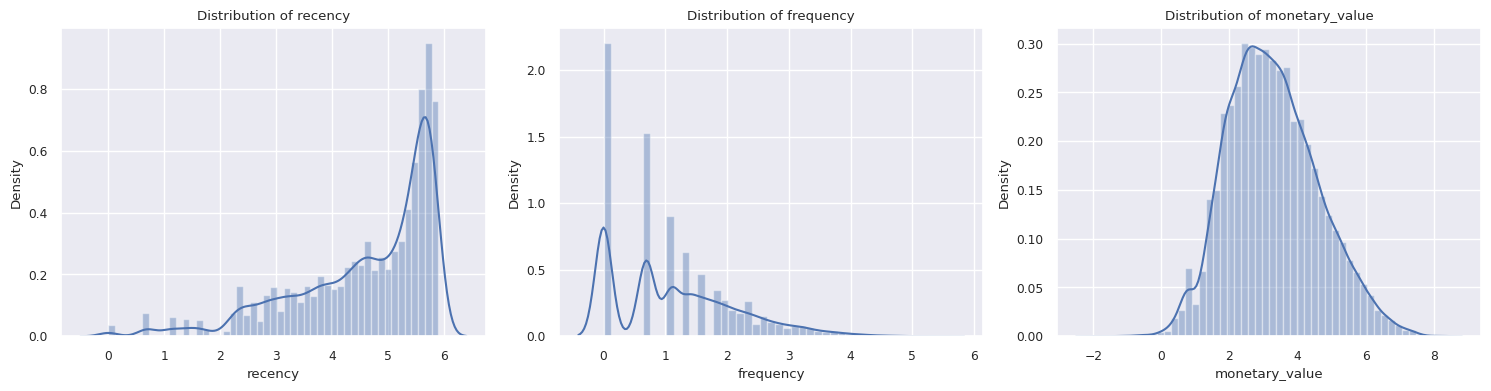

In [20]:
#Apply Log transformation

# Log transformation
rfm_log = np.log(rfm[['recency','frequency', 'monetary_value']]).round(3)

plt.figure(figsize=(15,4))
i=1
for col in ['recency','frequency','monetary_value']:
    ax=plt.subplot(1,3,i)
    sns.distplot(x=rfm_log[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    i +=1
plt.tight_layout()
plt.show();

Monetary value now resembles normal distribution but the other two features are still skewed

In [21]:
#Normalize with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Data for clustering
rfm_norm= scaler.transform(rfm_log)
rfm_norm = pd.DataFrame(data=rfm_norm, index=rfm_log.index, columns=rfm_log.columns)
rfm_norm.head()

,recency,frequency,monetary_value
Customer_ID,,,
1,1.005767,-0.450138,-0.368236
2,0.547929,-0.450138,-0.116253
3,1.051065,-0.048109,-0.670012
4,-0.510112,0.456902,0.170435
5,0.479173,0.456902,0.820762


Elbow Method to pick the optimal number of clusters for K-means algorithm:

* Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center
* Identify an "elbow" in the plot - the optimal number of clusters

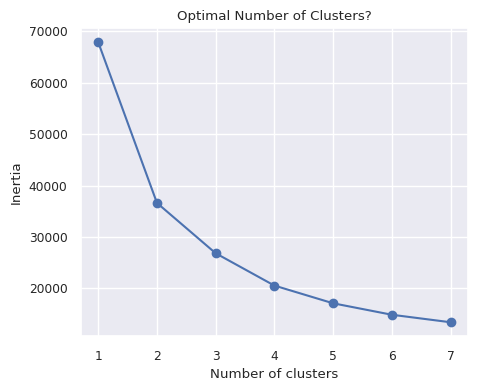

In [22]:
from sklearn.cluster import KMeans


n_clusters = range(1,8)
inertia=[]
for n in n_clusters :
    clusters = KMeans(n_clusters=n,random_state=1)
    clusters.fit(rfm_norm)
    inertia.append(clusters.inertia_)

# Plot n_clusters vs inertia
f, ax = plt.subplots(figsize=(5,4))
plt.plot(n_clusters, inertia, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters)
plt.title('Optimal Number of Clusters?')
plt.show()

Optimal number of clusters seems to be 3 or 4 using the elbow method

In [23]:
# KMeans
cl = KMeans(n_clusters= 3, random_state=1)
cl.fit(rfm_norm)

cluster_labels = cl.labels_

#average metrics and size for each cluster:
rfm_k3 = rfm.assign(k_cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_k3.groupby('k_cluster').agg({'recency': 'mean','frequency': 'mean',
                                         'monetary_value': ['mean', 'count'],}).round(0)

recency frequency monetary_value       
             mean      mean           mean  count
k_cluster                                        
0           190.0       2.0           12.0  10958
1           197.0       6.0           77.0   7607
2            22.0      16.0          212.0   4060

**Snake Plots for Comparison of Segments**

In [24]:
rfm_norm['k_cluster'] = cl.labels_
rfm_norm['rfm_cluster'] = rfm['rfm_cluster']


#Melt the data into a long format
rfm_melt = pd.melt(rfm_norm.reset_index(),id_vars=['Customer_ID','rfm_cluster','k_cluster'],value_vars=['recency', 'frequency', 'monetary_value'],
var_name='metric',value_name='value')
rfm_melt.head()

,Customer_ID,rfm_cluster,k_cluster,metric,value
0,1,Tier4,0,recency,1.005767
1,2,Tier3,0,recency,0.547929
2,3,Tier4,0,recency,1.051065
3,4,Tier2,1,recency,-0.510112
4,5,Tier2,1,recency,0.479173


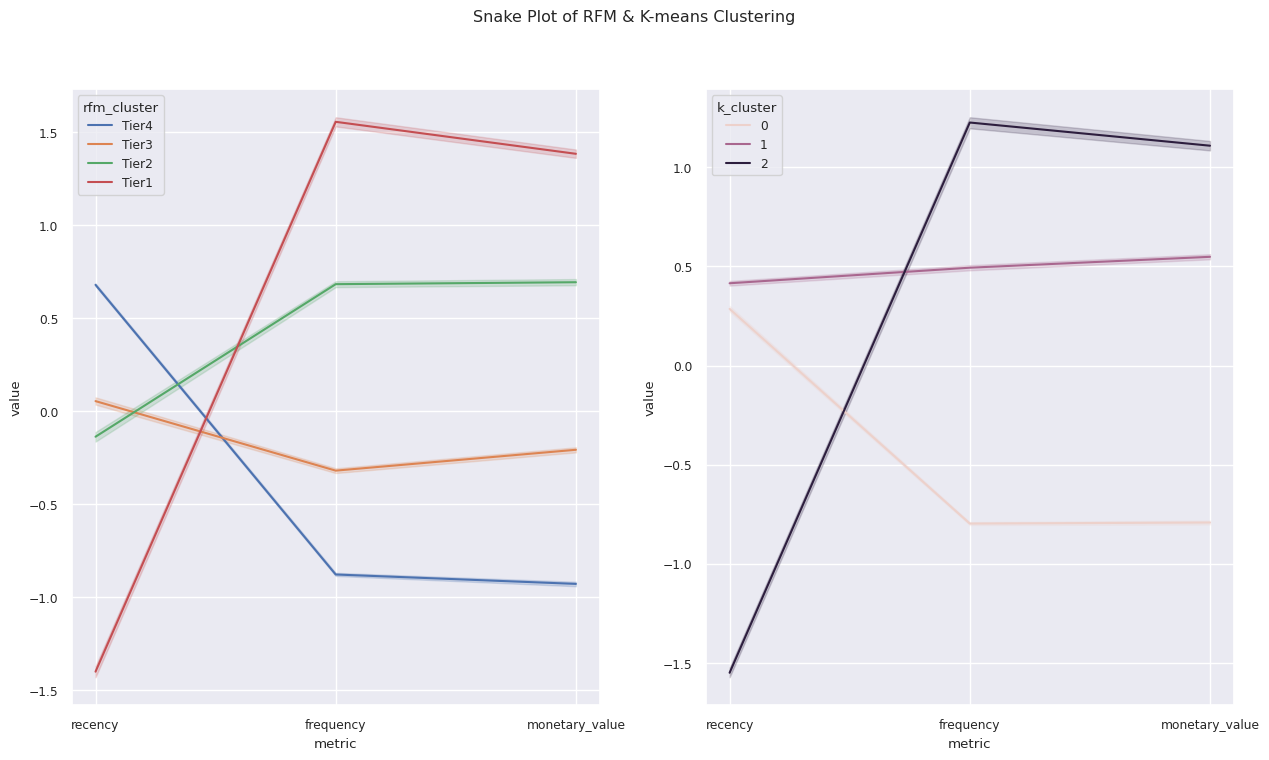

In [25]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'metric', y = 'value', hue = 'rfm_cluster', data = rfm_melt,ax=ax1)
sns.lineplot(x = 'metric', y = 'value', hue = 'k_cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM & K-means Clustering")
plt.show()

* The snake plot of RFM clusters shows that the value of recency is decresing with upgrade in cluster while the values of frequency and monetary values are increasing.
* For K-means, there's not much difference in the recency for the bottom 2 clusters. The frequency and monetary value show a trend similar to RFM

**Heatmap: Comparison of Variance between Groups**

In [26]:
k_cluster_avg = rfm_k3.groupby('k_cluster')[['recency','frequency','monetary_value']].mean()
population_avg = rfm.loc[:,['recency','frequency','monetary_value']].mean()
kmeans_imp = k_cluster_avg/population_avg -1
kmeans_imp.round(2)

,recency,frequency,monetary_value
k_cluster,,,
0,0.17,-0.74,-0.83
1,0.22,0.08,0.11
2,-0.87,1.83,2.04


* The  middle cluster shows lesser values because it's average is very close to the population average. 
* The second cluster shows very high values because the frequency and monetary values for these customers is much higher than the average of population. Recency is negative because it is much lower than the average of the population

In [27]:
rfm_cluster_avg = rfm.groupby('rfm_cluster')[['recency','frequency','monetary_value']].mean()
population_avg = rfm.loc[:,['recency','frequency','monetary_value']].mean()
rfm_imp = rfm_cluster_avg/population_avg -1
rfm_imp.round(2)

,recency,frequency,monetary_value
rfm_cluster,,,
Tier1,-0.84,2.43,2.67
Tier2,-0.17,0.33,0.39
Tier3,-0.02,-0.54,-0.60
Tier4,0.53,-0.76,-0.86


Similar trend as of k-means: Tier 1 being the highest tier has maximum values (max in the negative direction for recency)

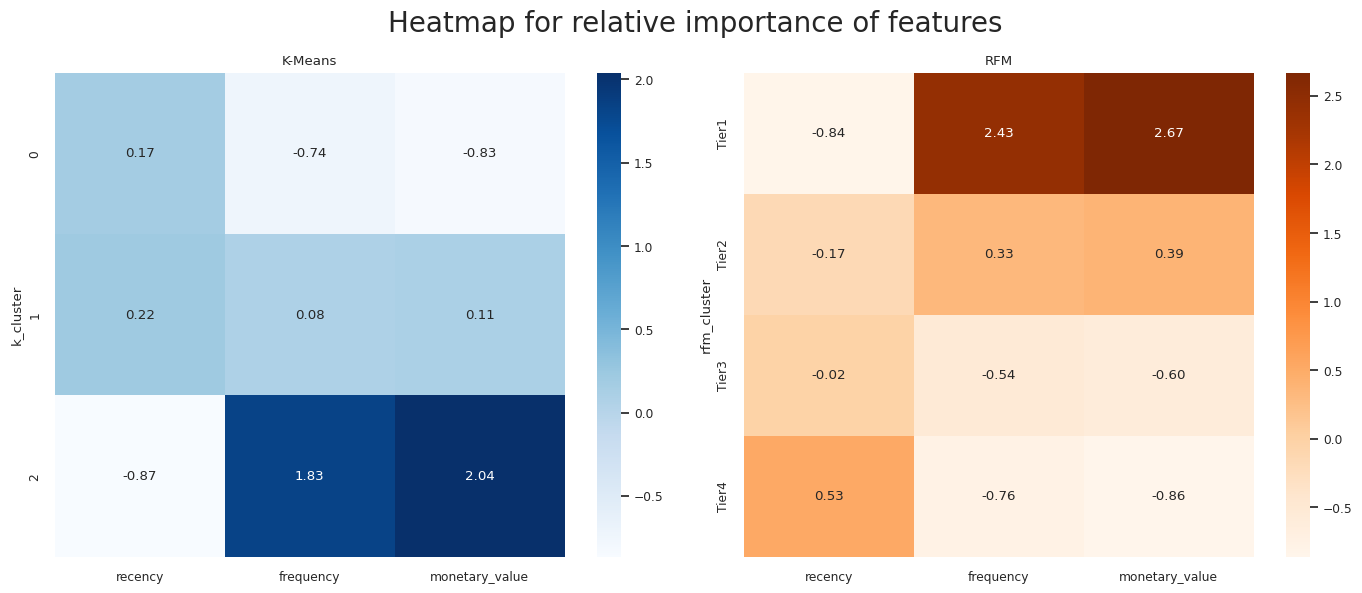

In [28]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))
sns.heatmap(data=kmeans_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "K-Means")

# a snake plot with K-Means
sns.heatmap(rfm_imp, fmt= '.2f', annot = True,cmap= 'Oranges', ax=ax2)
ax2.set(title = "RFM")

plt.suptitle("Heatmap for relative importance of features",fontsize=20) #make title fontsize subtitle 

plt.tight_layout()
plt.show()

It can be observed in both the models that the highest tier/cluster has the maximum figure (opposite for recency due to its inverse nature)

## Conclusion

* We started out by exploring the cohorts followed by retention rates of customers.
* We used the popular RFM (recency, frequency and monetary_value) framework to segment our customers into 4 different tiers
* We alternatively applied K-Means algorithm fter finding out that the ideal number of clusters would be 3. 
* We analysed our clusters for both K-means and RFM using snakeplots and heatmaps